In [4]:
import numpy as np
from sklearn.datasets import make_classification
from collections import Counter

# Function to compute Euclidean distance
def euclidean_dist(data1, data2):
    return np.sqrt(np.sum((np.array(data1) - np.array(data2))**2))

# Function to compute Manhattan distance
def manhattan(data1, data2):
    return np.sum(np.abs(np.array(data1) - np.array(data2)))

# Generate sample data
X_train, y_train = make_classification(
    n_samples=50, n_features=2, n_informative=2,
    n_redundant=0, n_classes=2, random_state=42
)

# A simple KNN classifier
def knn_predict(X_train, y_train, X_test, k=3, distance_metric='euclidean'):
    distances = []
    for x, y in zip(X_train, y_train):
        if distance_metric == 'euclidean':
            dist = euclidean_dist(x, X_test)
        elif distance_metric == 'manhattan':
            dist = manhattan(x, X_test)
        else:
            raise ValueError("Unsupported distance metric. Use 'euclidean' or 'manhattan'.")
        distances.append((dist, y))

    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]

    k_labels = [label for _, label in k_neighbors]
    predicted_label = Counter(k_labels).most_common(1)[0][0]
    return predicted_label

X_test = [0.5, 0.5]
k = 3
predicted_label_euclidean = knn_predict(X_train, y_train, X_test, k=k, distance_metric='euclidean')
predicted_label_manhattan = knn_predict(X_train, y_train, X_test, k=k, distance_metric='manhattan')

print(f"Predicted label using Euclidean distance: {predicted_label_euclidean}")
print(f"Predicted label using Manhattan distance: {predicted_label_manhattan}")

print('-------------------------------------------------------------------------------')

''' give your own X_test
  compute k neighbors of X_test data using Euclidean distance
  (show the distance of each neighbor)
  compute the target value of X_test '''

X_test = [1.0, -1.0]

# Compute k neighbors using Euclidean distance
def k_neighbors(X_train, y_train, X_test, k=3):
    distances = []
    for i, x in enumerate(X_train):
        dist = euclidean_dist(x, X_test)
        distances.append((dist, y_train[i]))

    # Sort by distance
    distances.sort(key=lambda x: x[0])

    # Display distances of each neighbor
    print("Distances of each neighbor:")
    for i, (dist, target) in enumerate(distances):
        print(f"Neighbor {i+1}: Distance = {dist:.4f}, Target = {target}")

    # Get k nearest neighbors
    k_neighbors = distances[:k]

    # Predict the target value
    k_labels = [label for _, label in k_neighbors]
    predicted_label = Counter(k_labels).most_common(1)[0][0]

    print(f"\nPredicted target value for X_test = {X_test}: {predicted_label}")
    return k_neighbors, predicted_label

# Set k value
k = 3
neighbors, predicted_label = k_neighbors(X_train, y_train, X_test, k=k)


Predicted label using Euclidean distance: 1
Predicted label using Manhattan distance: 1
-------------------------------------------------------------------------------
Distances of each neighbor:
Neighbor 1: Distance = 0.1399, Target = 1
Neighbor 2: Distance = 0.3844, Target = 1
Neighbor 3: Distance = 0.4278, Target = 1
Neighbor 4: Distance = 0.5511, Target = 1
Neighbor 5: Distance = 0.6878, Target = 1
Neighbor 6: Distance = 0.6973, Target = 1
Neighbor 7: Distance = 0.8706, Target = 1
Neighbor 8: Distance = 0.8767, Target = 1
Neighbor 9: Distance = 1.0415, Target = 1
Neighbor 10: Distance = 1.0704, Target = 1
Neighbor 11: Distance = 1.1157, Target = 0
Neighbor 12: Distance = 1.1507, Target = 1
Neighbor 13: Distance = 1.2919, Target = 1
Neighbor 14: Distance = 1.3565, Target = 1
Neighbor 15: Distance = 1.5408, Target = 0
Neighbor 16: Distance = 1.6038, Target = 0
Neighbor 17: Distance = 1.6484, Target = 0
Neighbor 18: Distance = 1.7335, Target = 0
Neighbor 19: Distance = 1.8016, Target 

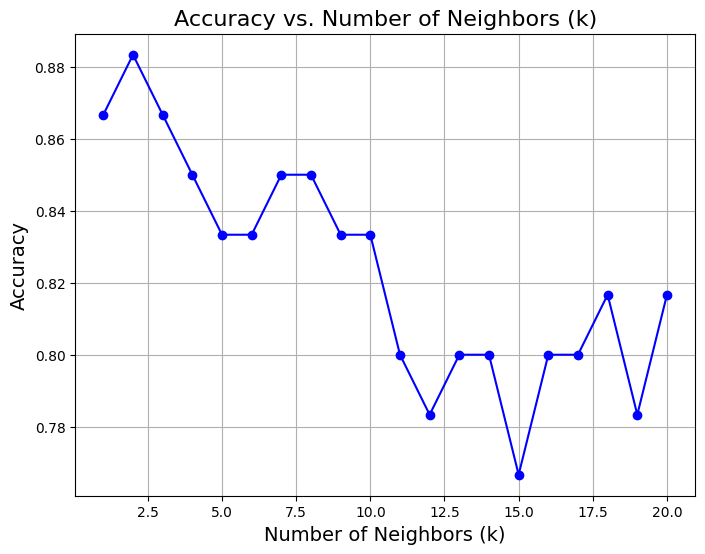

In [5]:
# 2) [4 pts] Show a plot of accuracy vs number of neighbors

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Generate a sample dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_classes=2, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k)', fontsize=16)
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()


In [6]:
# 3) [bonus 5 pts] Use Manhattan instead of Euclidean and repeat Q. 1)-2).

import numpy as np
from sklearn.datasets import make_classification
from collections import Counter

def manhattan(data1, data2):
    return np.sum(np.abs(np.array(data1) - np.array(data2)))

X_train, y_train = make_classification(
    n_samples=50, n_features=2, n_informative=2,
    n_redundant=0, n_classes=2, random_state=42
)

X_test = [1.0, -1.0]

def k_neighbors_manhattan(X_train, y_train, X_test, k=3):
    distances = []
    for i, x in enumerate(X_train):
        dist = manhattan(x, X_test)
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    print("Distances of each neighbor using Manhattan distance:")
    for i, (dist, target) in enumerate(distances):
        print(f"Neighbor {i+1}: Distance = {dist:.4f}, Target = {target}")

    k_neighbors = distances[:k]
    k_labels = [label for _, label in k_neighbors]
    predicted_label = Counter(k_labels).most_common(1)[0][0]

    print(f"\nPredicted target value for X_test = {X_test}: {predicted_label}")
    return k_neighbors, predicted_label

# Set k value
k = 3
neighbors, predicted_label = k_neighbors_manhattan(X_train, y_train, X_test, k=k)


Distances of each neighbor using Manhattan distance:
Neighbor 1: Distance = 0.1951, Target = 1
Neighbor 2: Distance = 0.4764, Target = 1
Neighbor 3: Distance = 0.5436, Target = 1
Neighbor 4: Distance = 0.6370, Target = 1
Neighbor 5: Distance = 0.8521, Target = 1
Neighbor 6: Distance = 0.9604, Target = 1
Neighbor 7: Distance = 0.9809, Target = 1
Neighbor 8: Distance = 1.0755, Target = 1
Neighbor 9: Distance = 1.4282, Target = 1
Neighbor 10: Distance = 1.4693, Target = 1
Neighbor 11: Distance = 1.5650, Target = 1
Neighbor 12: Distance = 1.5673, Target = 1
Neighbor 13: Distance = 1.5711, Target = 0
Neighbor 14: Distance = 1.6108, Target = 0
Neighbor 15: Distance = 1.7187, Target = 1
Neighbor 16: Distance = 1.7391, Target = 0
Neighbor 17: Distance = 2.0105, Target = 0
Neighbor 18: Distance = 2.0218, Target = 0
Neighbor 19: Distance = 2.0465, Target = 1
Neighbor 20: Distance = 2.0908, Target = 1
Neighbor 21: Distance = 2.2458, Target = 1
Neighbor 22: Distance = 2.2502, Target = 0
Neighbor 2